# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [235]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance

In [213]:
### Reading the file

df = pd.read_csv("C:/Users/natha/Downloads/practical_application_II_starter/data/vehicles.csv")

In [214]:
### Understanding what information the dataset contains

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Answer | _Data Task Business Understanding_

_Predict the price of a used car, based on its characteristics and verify which variables influence the most in the final price.
Evaluate the relationship between the variable and the final price, for example: the newer the car, the higher the price, which models are more valued, etc._

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [215]:
### Checking how the features are populated

df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [216]:
### Describing to understand the main values of numerical features

df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [217]:
# Checking the missing values

missing_vals = None
missing_vals = df.isnull().sum()
print(type(missing_vals))
missing_vals

<class 'pandas.core.series.Series'>


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

_These variables will be discarded because have many null values: "size", "condition", "cylinders", "VIN", "drive", "paint_color"._

_As there are many Non-Numeric Features, each of these variables will be analyzed to assess the need to remain as an object of analysis._

In [218]:
count_df = df.nunique()
count_df

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

_Non-Numeric features with many unique values will be excluded from the data frame, like: "region" and "model". The columns "state" and "manufacturer" will be checked in the next steps._

In [219]:
manufacturer_df = df['manufacturer'].value_counts(normalize = True)
manufacturer_df

ford               0.173458
chevrolet          0.134554
toyota             0.083576
honda              0.051973
nissan             0.046592
jeep               0.046462
ram                0.044820
gmc                0.041016
bmw                0.035918
dodge              0.033494
mercedes-benz      0.028876
hyundai            0.025262
subaru             0.023202
volkswagen         0.022835
kia                0.020665
lexus              0.020037
audi               0.018505
cadillac           0.016990
chrysler           0.014737
acura              0.014608
buick              0.013442
mazda              0.013261
infiniti           0.011734
lincoln            0.010312
volvo              0.008245
mitsubishi         0.008044
mini               0.005806
pontiac            0.005591
rover              0.005163
jaguar             0.004755
porsche            0.003382
mercury            0.002893
saturn             0.002664
alfa-romeo         0.002192
tesla              0.002121
fiat               0

In [220]:
state_df = df['state'].value_counts(normalize = True)
state_df

ca    0.118567
fl    0.066789
tx    0.053750
ny    0.045413
oh    0.041454
or    0.040067
mi    0.039590
nc    0.035788
wa    0.032470
pa    0.032217
wi    0.026701
co    0.025975
tn    0.025923
va    0.025141
il    0.024332
nj    0.022821
id    0.020992
az    0.020331
ia    0.020221
ma    0.019148
mn    0.018075
ga    0.016405
ok    0.015911
sc    0.014821
mt    0.014744
ks    0.014545
in    0.013362
ct    0.012153
al    0.011607
md    0.011193
nm    0.010366
mo    0.010057
ky    0.009719
ar    0.009459
ak    0.008138
la    0.007487
nv    0.007482
nh    0.006983
dc    0.006957
me    0.006948
hi    0.006943
vt    0.005887
ri    0.005435
sd    0.003050
ut    0.002694
wv    0.002464
ne    0.002427
ms    0.002380
de    0.002223
wy    0.001429
nd    0.000960
Name: state, dtype: float64

_"Manufacture" and "State" may be important to determine the price._

In [190]:
fuel_df = df['fuel'].value_counts(normalize = True)
fuel_df

gas         0.840379
other       0.072494
diesel      0.070923
hybrid      0.012197
electric    0.004006
Name: fuel, dtype: float64

In [191]:
status_df = df['title_status'].value_counts(normalize = True)
status_df

clean         0.967702
rebuilt       0.017244
salvage       0.009239
lien          0.003397
missing       0.001944
parts only    0.000473
Name: title_status, dtype: float64

In [192]:
transmission_df = df['transmission'].value_counts(normalize = True)
transmission_df

automatic    0.793083
other        0.147722
manual       0.059195
Name: transmission, dtype: float64

In [193]:
type_df = df['type'].value_counts(normalize = True)
type_df

sedan          0.260630
SUV            0.231374
pickup         0.130261
truck          0.105619
other          0.066193
coupe          0.057493
hatchback      0.049691
wagon          0.032187
van            0.025591
convertible    0.023145
mini-van       0.014445
offroad        0.001823
bus            0.001548
Name: type, dtype: float64

Text(0.5, 1.0, 'Price Histogram')

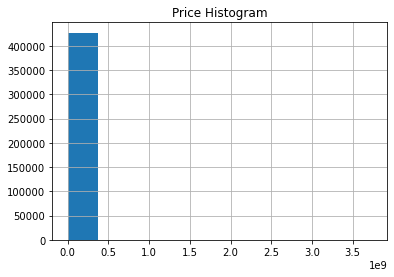

In [221]:
### Price Histogram

df['price'].hist(grid=True)
plt.title('Price Histogram')

Text(0.5, 1.0, 'Price Histogram < 500k')

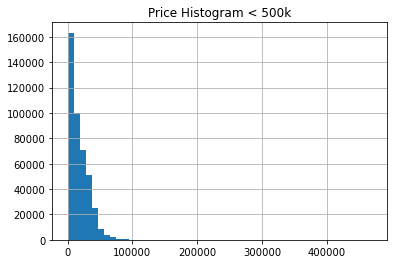

In [222]:
### Excluding the outliers from the histogram of price

df_lt500k = df.query('price <500000')
df_lt500k['price'].hist(grid=True, bins=50)
plt.title('Price Histogram < 500k')

Text(0.5, 1.0, 'Price Histogram < 100k')

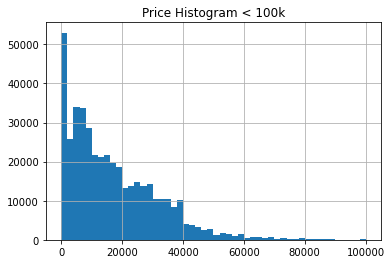

In [196]:
### The prices are concentrated up to $100K

df_lt100k = df.query('price <100000')
df_lt100k['price'].hist(grid=True, bins=50)
plt.title('Price Histogram < 100k')

Text(0.5, 1.0, 'Price Histogram > 500k')

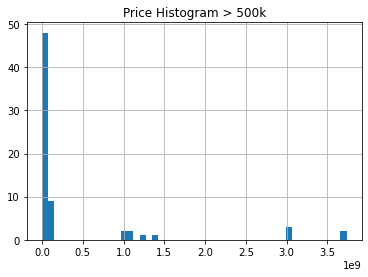

In [197]:
### Just checking the histograms for car with price above $500k

df_gt500k = df.query('price >500000')
df_gt500k['price'].hist(grid=True, bins=50)
plt.title('Price Histogram > 500k')

Text(0, 0.5, 'Price)')

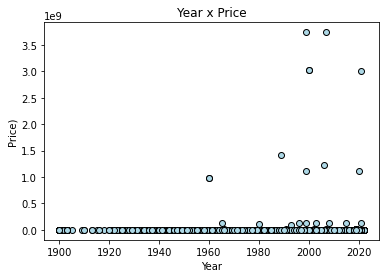

In [198]:
### The relationship betweem price and Year

plt.scatter(x=df['year'], y=df['price'],c='lightblue', edgecolor='black')
plt.title('Year x Price')
plt.xlabel('Year')
plt.ylabel('Price)')

Text(0, 0.5, 'Price)')

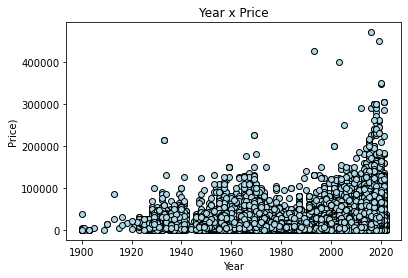

In [199]:
### The relationship betweem price and Year, for cars with price up to $500K

plt.scatter(x=df_lt500k['year'], y=df_lt500k['price'],c='lightblue', edgecolor='black')
plt.title('Year x Price')
plt.xlabel('Year')
plt.ylabel('Price)')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [223]:
#Creating the column with the car "age"

df['age'] = 2022-df['year']
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy,3.0
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy,2.0
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy,2.0
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy,4.0
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy,3.0


In [224]:
#keeping the columns that matters
df_clean = df.drop(columns = ['region','model','condition','cylinders','VIN','drive','size','paint_color','id','year'])
df_clean_nonull=df_clean.dropna()
df_clean_nonull.info()
df_clean_nonull.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309826 entries, 27 to 426879
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         309826 non-null  int64  
 1   manufacturer  309826 non-null  object 
 2   fuel          309826 non-null  object 
 3   odometer      309826 non-null  float64
 4   title_status  309826 non-null  object 
 5   transmission  309826 non-null  object 
 6   type          309826 non-null  object 
 7   state         309826 non-null  object 
 8   age           309826 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 23.6+ MB


,price,manufacturer,fuel,odometer,title_status,transmission,type,state,age
27,33590,gmc,gas,57923.0,clean,other,pickup,al,8.0
28,22590,chevrolet,gas,71229.0,clean,other,pickup,al,12.0
29,39590,chevrolet,gas,19160.0,clean,other,pickup,al,2.0
30,30990,toyota,gas,41124.0,clean,other,pickup,al,5.0
31,15000,ford,gas,128000.0,clean,automatic,truck,al,9.0


In [225]:
### Removing outliers form the dataset

df_final = df_clean_nonull.query('price<100000 and price>100')
df_final.head()

,price,manufacturer,fuel,odometer,title_status,transmission,type,state,age
27,33590,gmc,gas,57923.0,clean,other,pickup,al,8.0
28,22590,chevrolet,gas,71229.0,clean,other,pickup,al,12.0
29,39590,chevrolet,gas,19160.0,clean,other,pickup,al,2.0
30,30990,toyota,gas,41124.0,clean,other,pickup,al,5.0
31,15000,ford,gas,128000.0,clean,automatic,truck,al,9.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Text(0, 0.5, 'Price)')

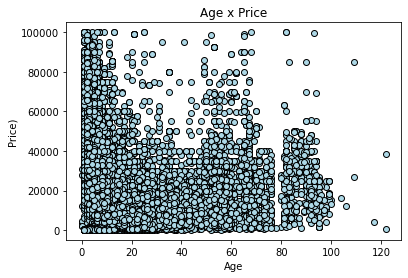

In [203]:
plt.scatter(x=df_final['age'], y=df_final['price'],c='lightblue', edgecolor='black')
plt.title('Age x Price')
plt.xlabel('Age')
plt.ylabel('Price)')

In [226]:
X = df_final.drop('price', axis = 1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

cat_1 = ['fuel','title_status','transmission','type', 'state', 'manufacturer']
num = ['odometer','age']

In [227]:
preprocessor = make_column_transformer(
 (OneHotEncoder(drop = "if_binary"),cat_1),
 (StandardScaler(),num),
  remainder = "drop",
  verbose_feature_names_out = False
)

In [206]:
ridge_param_dict = ''
ridge_pipe = ''
ridge_grid = ''
ridge_train_mse = ''
ridge_test_mse = ''

ridge_param_dict = {'ridge__regressor__alpha': np.logspace(0, 10, 50)}

ridge_pipe = Pipeline([('ridge', TransformedTargetRegressor(regressor= Ridge(),func=np.log10, inverse_func=sp.special.exp10))])

ridge_grid = GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict)
ridge_grid_cv = make_pipeline(preprocessor, ridge_grid)
ridge_grid_cv.fit(X_train, y_train)
ridge_train_preds = ridge_grid_cv.predict(X_train)
ridge_test_preds = ridge_grid_cv.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
best_model = ridge_grid.best_params_
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
print(best_model)

Train MSE: 105323859.11583036
Test MSE: 108163215.15205385
{'ridge__regressor__alpha': 1.0}


Text(0.5, 0, 'Real Data')

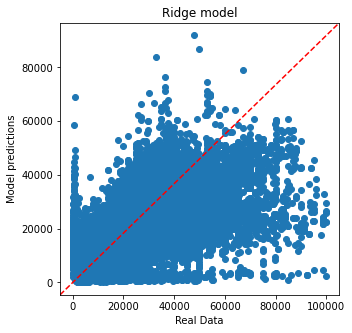

In [207]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, ridge_test_preds)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.title("Ridge model")
plt.ylabel("Model predictions")
plt.xlabel("Real Data")

In [231]:
model_tree = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=DecisionTreeRegressor(), func=np.log10, inverse_func=sp.special.exp10))

In [232]:
model_tree.fit(X_train, y_train)

y_tree_pred_train = model_tree.predict(X_train)
y_tree_pred_test = model_tree.predict(X_test)

y_tree_pred_train_mse = mean_squared_error(y_train, y_tree_pred_train)
y_tree_pred_test_mse = mean_squared_error(y_test, y_tree_pred_test)

print(f'Train MSE: {y_tree_pred_train_mse}')
print(f'Test MSE: {y_tree_pred_test_mse}')

Train MSE: 212385.03634118315
Test MSE: 43278788.36381393


Text(0.5, 0, 'Real Data')

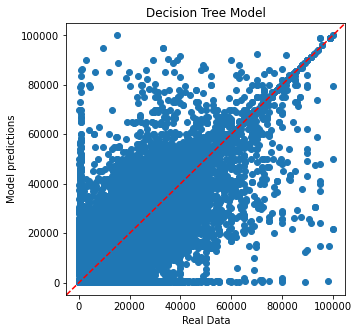

In [233]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_tree_pred_test)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.title("Decision Tree Model")
plt.ylabel("Model predictions")
plt.xlabel("Real Data")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [236]:
### Permutation Importance for the Decision Tree Model

scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    model_tree, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
            print(f"    {X_test.columns[i]:<8} " #
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

r2
    age      0.682 +/- 0.005
    odometer 0.602 +/- 0.006
    type     0.565 +/- 0.004
    manufacturer 0.325 +/- 0.004
    fuel     0.179 +/- 0.003
    transmission 0.166 +/- 0.003
    state    0.119 +/- 0.003
    title_status 0.012 +/- 0.001
neg_mean_absolute_percentage_error
    age      0.824 +/- 0.022
    odometer 0.778 +/- 0.014
    type     0.702 +/- 0.016
    manufacturer 0.527 +/- 0.015
    state    0.509 +/- 0.013
    fuel     0.182 +/- 0.012
    transmission 0.177 +/- 0.010
    title_status 0.013 +/- 0.002
neg_mean_squared_error
    age      138515005.605 +/- 984030.252
    odometer 122379202.788 +/- 1227484.361
    type     114705888.236 +/- 874081.897
    manufacturer 66068338.916 +/- 877558.259
    fuel     36435054.193 +/- 584509.474
    transmission 33825055.300 +/- 608456.305
    state    24203085.483 +/- 532285.714
    title_status 2447511.902 +/- 129125.004


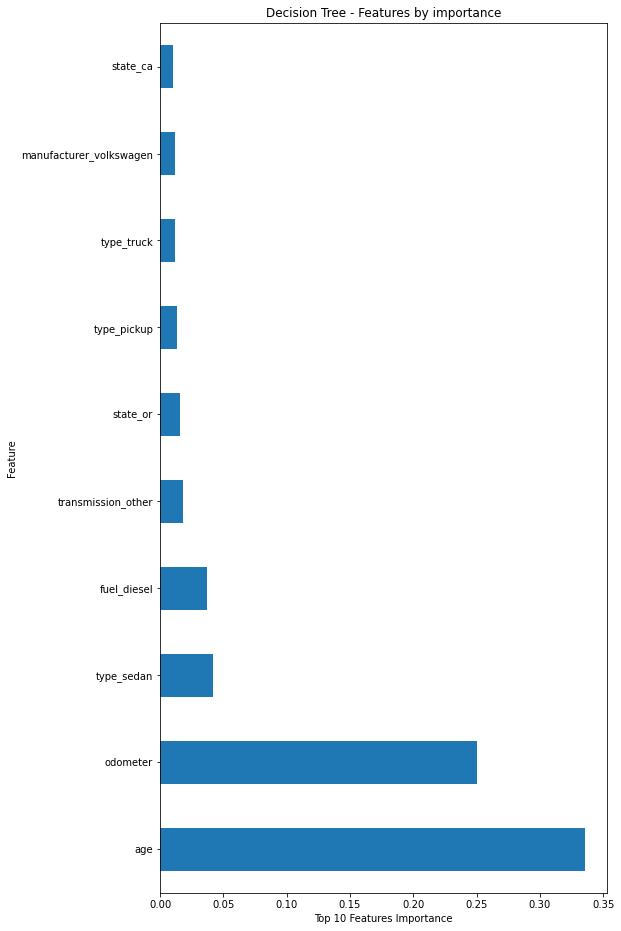

In [240]:
feature_names = model_tree[:-1].get_feature_names_out() 
plt.figure(figsize = (8,16))
plt.title("Decision Tree - Features by importance")
plt.ylabel("Feature")
plt.xlabel("Top 10 Features Importance")
feat_importances = pd.Series(model_tree[-1].regressor_.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

_The model that brought a better result was the Decision Tree. According to this model, the most relevant characteristics to determine the price is: Age, Odometer, Type, Manufacturer._
_At the beginning of the analysis, I decided not to consider some variables that had many null values and thus kept a considerable number of entries in the training set. An improvement that could be tested on the model is trying to model with a smaller number of inputs but keeping some features that were discarded.
In the ideal scenario, to have a better model, we could improve the quality of information that has a high number of null entries._

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Before detailing the most influential factors to determine the price of cars, below are described some characteristics of the cars sold that were analyzed:
1) About 30% of cars are made by for and chevrolet.
2) 12% of the cars are from the state of California.
3) The fuel is gas for 84% of the cars, a high concentration in this type of fuel.
4) 80% of cars have automatic transmission.
5) Almost 50% of the cars are Sedan or SUV types.
6) Most of the cars were sold for up to $100,000.

One of the characteristics that calls attention in this sample of cars sold is the concentration in cars with fuel Gas, since this type should fall into disuse with the replacement by hybrid or electric cars.
Thinking about a stock adjustment, the characteristics that most impact the selling price are: Year of Manufacture, miles marked on the odometer, Sedan type cars and Diesel fuel type.
Thus, to adjust the inventory, cars with these characteristics should be prioritized, but noting the fact that in the analyzed data, hybrid and electric cars are not very representative, but this could change significantly in the coming years.